<a href="https://colab.research.google.com/github/Mestrie/Atividade-Extra-Redes-Neurais/blob/main/extra_task_antonio_justino_thales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise Exploratória
 A seguir temos a chamada de parte de um dataset de serie temporais. a ideia central é conseguir identicar falhas no sensoriamento

In [ ]:
import pandas as pd
import numpy as np
df_1 = pd.read_csv('dataset_parte_1.csv')
df_2 = pd.read_csv('dataset_parte_2.csv')
df_3 = pd.read_csv('dataset_parte_3.csv')
df_4 = pd.read_csv('dataset_parte_4.csv')
df_5 = pd.read_csv('dataset_parte_5.csv')
df_6 = pd.read_csv('dataset_parte_6.csv')
df_7 = pd.read_csv('dataset_parte_7.csv')
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)
print(df_5.shape)
print(df_6.shape)
print(df_7.shape)

/tmp/ipython-input-1-2855579830.py:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('dataset_parte_1.csv')


(100000, 36)
(100000, 36)
(100000, 36)
(100000, 36)
(100000, 36)
(100000, 36)
(3814, 36)


## Fusão de Dataset - (Dataset Completo)

In [ ]:
df_total = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], ignore_index=True)
print(df_total.shape)

(603814, 36)


In [ ]:
df_total.head()

,Timestamp,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,label
0,2023-09-24 00:00:00.863,-3.255208,-4.984538,-5.086263,-4.984538,-5.493164,-4.781087,-5.696614,-5.187988,-4.882812,...,-4.170735,-4.170735,-0.712077,-3.967285,-4.069010,-3.662109,-3.865560,-3.967285,-4.272461,sensor_1
1,2023-09-24 00:00:01.863,5.900065,9.155273,8.443196,9.053548,8.748372,8.036295,9.053548,8.850098,7.731120,...,5.187988,5.086263,1.118978,4.984538,5.086263,4.577637,4.679362,4.577637,4.882812,sensor_20
2,2023-09-24 00:00:02.863,7.222493,11.494954,10.375977,11.291504,10.782877,9.969075,11.189778,10.375977,9.358724,...,6.001790,6.103516,1.118978,5.798340,5.900065,5.289713,5.594889,5.289713,5.594889,sensor_28
3,2023-09-24 00:00:03.863,3.051758,5.289713,4.577637,5.187988,4.781087,4.577637,5.086263,4.577637,3.967285,...,1.831055,2.339681,0.000000,2.034505,1.831055,1.831055,1.525879,1.525879,1.831055,NaN
4,2023-09-24 00:00:04.863,0.406901,1.831055,1.118978,1.525879,1.525879,1.118978,1.729329,1.525879,1.831055,...,0.508626,0.101725,-0.305176,0.101725,0.101725,0.000000,-0.101725,-0.406901,0.000000,NaN


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603814 entries, 0 to 603813
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  603814 non-null  object 
 1   sensor_1   603814 non-null  float64
 2   sensor_2   603814 non-null  float64
 3   sensor_3   603814 non-null  float64
 4   sensor_4   603814 non-null  float64
 5   sensor_5   603814 non-null  float64
 6   sensor_6   603814 non-null  float64
 7   sensor_7   603814 non-null  float64
 8   sensor_8   603814 non-null  float64
 9   sensor_9   603814 non-null  float64
 10  sensor_10  603814 non-null  float64
 11  sensor_11  603814 non-null  float64
 12  sensor_12  603814 non-null  float64
 13  sensor_13  603814 non-null  float64
 14  sensor_14  603814 non-null  float64
 15  sensor_15  603814 non-null  float64
 16  sensor_16  603814 non-null  float64
 17  sensor_17  603814 non-null  float64
 18  sensor_18  603814 non-null  float64
 19  sensor_19  603814 non-n

### Visualização da Distribuição dos Sensores com Boxplot

Visualização da distribuição dos dados provenientes dos sensores utilizando um **gráfico do tipo boxplot**. O objetivo é analisar o comportamento estatístico de cada sensor individualmente, observando:

- A **mediana** dos valores coletados;
- A **dispersão** dos dados (intervalo interquartil);
- A presença de **outliers** (valores atípicos);
- Diferenças de escala ou comportamento entre os sensores.

Para isso, o código seleciona automaticamente as colunas referentes aos sensores (`sensor_1` até `sensor_34`), filtra o DataFrame original para manter apenas essas colunas e, por fim, plota um boxplot para cada uma. A visualização facilita a detecção de sensores com comportamentos anômalos ou inconsistentes.

O gráfico é configurado com um tamanho ampliado para acomodar todos os sensores no eixo X e com os rótulos rotacionados para melhor leitura.


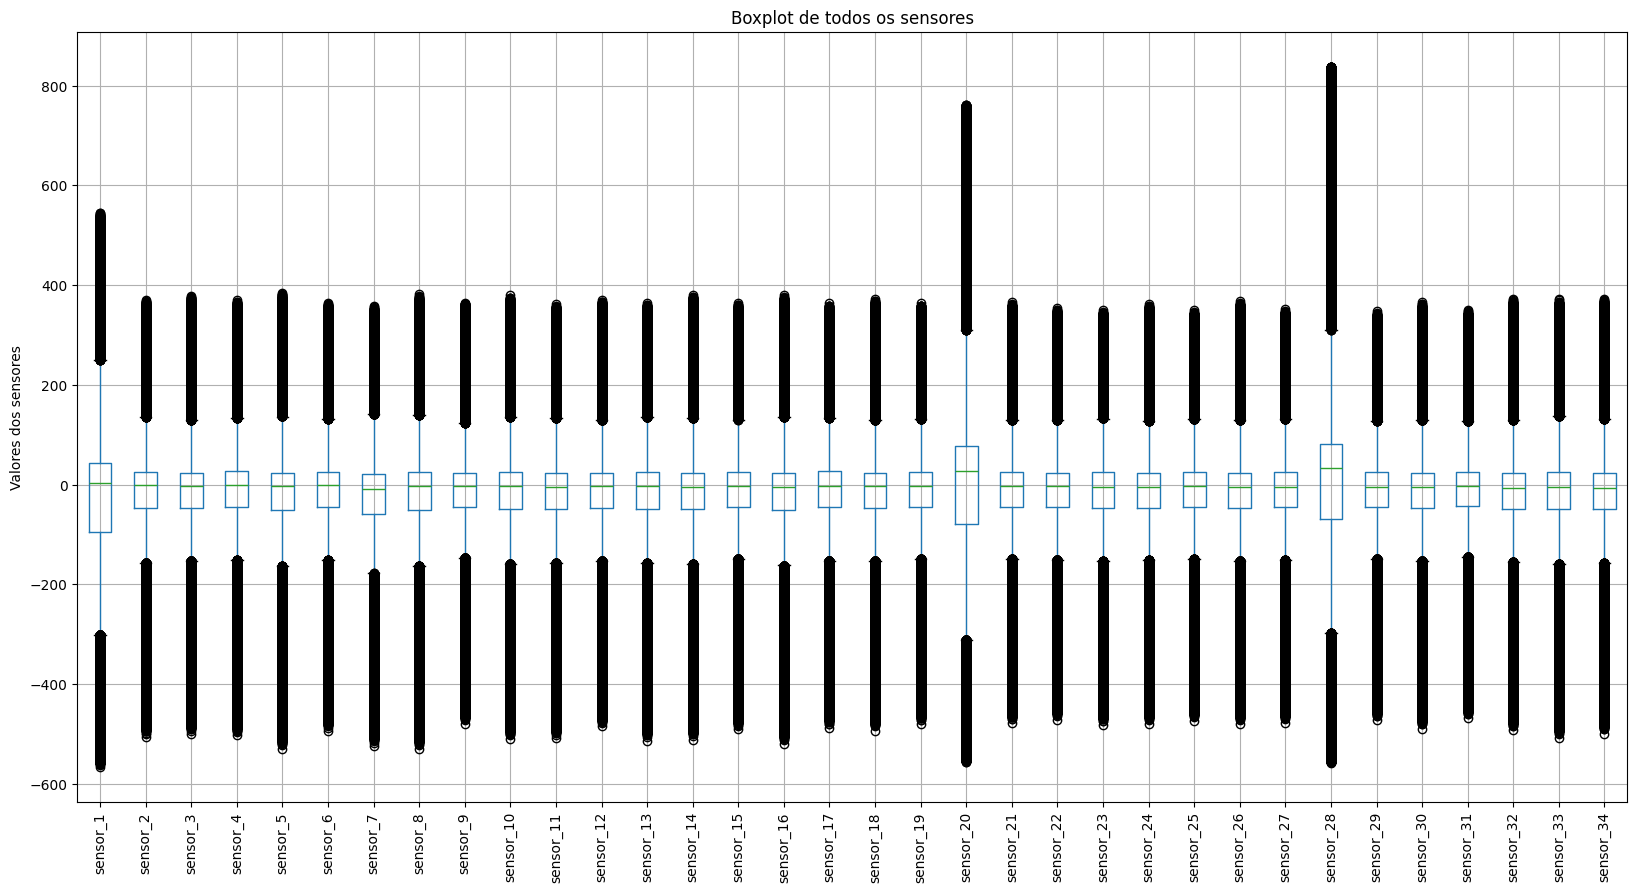

In [ ]:
import matplotlib.pyplot as plt

# Selecionar apenas as colunas dos sensores
sensor_columns = [f'sensor_{i}' for i in range(1, 35)]
df_sensors = df_total[sensor_columns]

# Criar o boxplot
plt.figure(figsize=(20, 10))  # Ajuste o tamanho conforme necessário
df_sensors.boxplot()
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.title('Boxplot de todos os sensores')
plt.ylabel('Valores dos sensores')
plt.show()

#Aqui consegimos identificar que os dados de label estão OU:
 - Incompletos
 - Completos porém só com 3 casos de sensores com falhas

### Criação de Rótulos Binários para Cada Sensor

Transformar a coluna `label`, que contém o nome de um sensor associado a um determinado evento ou condição, em múltiplas **colunas de rótulos binários** — uma para cada sensor.

#### Etapas do processo:

1. **Identificação das colunas dos sensores**:  
   São selecionadas automaticamente todas as colunas que contêm a substring `'sensor_'` no nome.

2. **Criação dos rótulos binários**:  
   Para cada sensor, é criada uma nova coluna chamada `label_sensor_X`, onde:
   - O valor será `1` se o sensor indicado estiver presente na coluna `label`;
   - Caso contrário, será `0`.

3. **Visualização dos rótulos**:  
   O código exibe a contagem de valores (`0` e `1`) em cada uma das colunas de rótulo geradas, permitindo verificar a distribuição de amostras positivas e negativas por sensor.

Essa transformação é especialmente útil para tarefas de **classificação binária independente** por sensor ou para análise individual do comportamento de cada um frente a eventos específicos.


In [ ]:
# 2. Identifique as colunas dos sensores
sensor_columns = [col for col in df_total.columns if 'sensor_' in col]

# 3. Crie as colunas de rótulo binário para cada sensor
for sensor in sensor_columns:
    # A nova coluna de rótulo terá o valor 1 se o nome do sensor estiver na coluna 'label'
    df_total[f'label_{sensor}'] = np.where(df_total['label'] == sensor, 1, 0)


In [ ]:
df_total['label_sensor_1'].value_counts()

,count
label_sensor_1,
0,603813
1,1


In [ ]:
for x in range (1, 35):
  print(df_total[f'label_sensor_{x}'].value_counts())

label_sensor_1
0    603813
1         1
Name: count, dtype: int64
label_sensor_2
0    603814
Name: count, dtype: int64
label_sensor_3
0    603814
Name: count, dtype: int64
label_sensor_4
0    603814
Name: count, dtype: int64
label_sensor_5
0    603814
Name: count, dtype: int64
label_sensor_6
0    603814
Name: count, dtype: int64
label_sensor_7
0    603814
Name: count, dtype: int64
label_sensor_8
0    603814
Name: count, dtype: int64
label_sensor_9
0    603814
Name: count, dtype: int64
label_sensor_10
0    603814
Name: count, dtype: int64
label_sensor_11
0    603814
Name: count, dtype: int64
label_sensor_12
0    603814
Name: count, dtype: int64
label_sensor_13
0    603814
Name: count, dtype: int64
label_sensor_14
0    603814
Name: count, dtype: int64
label_sensor_15
0    603814
Name: count, dtype: int64
label_sensor_16
0    603814
Name: count, dtype: int64
label_sensor_17
0    603814
Name: count, dtype: int64
label_sensor_18
0    603814
Name: count, dtype: int64
label_sensor_19
0    6038

#Analisando a frequência de coleta de dados.

### Cálculo do Intervalo de Tempo entre Leituras

Cálculo do **intervalo de tempo entre registros consecutivos** com base na coluna `Timestamp`, que representa o momento de coleta dos dados.

#### Etapas do processo:

1. **Conversão para datetime**:  
   Garante que a coluna `Timestamp` esteja no formato correto de data e hora, utilizando `pd.to_datetime`.

2. **Cálculo da diferença temporal**:  
   Cria uma nova coluna chamada `intervalo_tempo`, que armazena a diferença de tempo entre cada linha e a anterior. Esse cálculo é feito com o método `.diff()` aplicado sobre a coluna `Timestamp`.

3. **Visualização inicial dos intervalos**:  
   Exibe as primeiras linhas das colunas `Timestamp` e `intervalo_tempo`, permitindo uma análise rápida dos intervalos calculados.

4. **Verificação da estrutura do DataFrame**:  
   A chamada `df_total.info()` mostra um resumo da estrutura dos dados, incluindo tipos de dados e quantidade de valores nulos, útil para validação e diagnóstico.

Esse tipo de análise é essencial para verificar a **frequência de coleta dos dados**, identificar **falhas ou atrasos** nos registros e preparar os dados para análises temporais.


In [ ]:
import pandas as pd

# Certifique-se de que a coluna Timestamp está em formato datetime
df_total['Timestamp'] = pd.to_datetime(df_total['Timestamp'])

# Calcula a diferença entre cada linha consecutiva
df_total['intervalo_tempo'] = df_total['Timestamp'].diff()

# Exibe os primeiros intervalos
print(df_total[['Timestamp', 'intervalo_tempo']].head())

                Timestamp intervalo_tempo
0 2023-09-24 00:00:00.863             NaT
1 2023-09-24 00:00:01.863 0 days 00:00:01
2 2023-09-24 00:00:02.863 0 days 00:00:01
3 2023-09-24 00:00:03.863 0 days 00:00:01
4 2023-09-24 00:00:04.863 0 days 00:00:01


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603814 entries, 0 to 603813
Data columns (total 71 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   Timestamp        603814 non-null  datetime64[ns] 
 1   sensor_1         603814 non-null  float64        
 2   sensor_2         603814 non-null  float64        
 3   sensor_3         603814 non-null  float64        
 4   sensor_4         603814 non-null  float64        
 5   sensor_5         603814 non-null  float64        
 6   sensor_6         603814 non-null  float64        
 7   sensor_7         603814 non-null  float64        
 8   sensor_8         603814 non-null  float64        
 9   sensor_9         603814 non-null  float64        
 10  sensor_10        603814 non-null  float64        
 11  sensor_11        603814 non-null  float64        
 12  sensor_12        603814 non-null  float64        
 13  sensor_13        603814 non-null  float64        
 14  sens

#Verificando se todos os intervalos são realmente de 1 segundo

### Detecção de Gaps de Tempo Maiores que 2 Segundos

Identificar **falhas ou interrupções na sequência temporal dos dados**, verificando se existem intervalos de tempo maiores que o esperado entre as leituras.

#### Etapas do processo:

1. **Conversão da coluna `Timestamp` para datetime**:  
   Garante que os dados de tempo estejam no formato correto para operações temporais.

2. **Cálculo da diferença entre timestamps consecutivos**:  
   Cria a coluna `intervalo_tempo`, que armazena o tempo decorrido entre cada linha e a anterior.

3. **Identificação de gaps maiores que 2 segundos**:  
   Filtra os índices onde o valor do `intervalo_tempo` é superior a 2 segundos, o que pode indicar uma falha, atraso ou perda de leitura.

4. **Inspeção das ocorrências**:  
   Para cada índice identificado, exibe três linhas:
   - A **linha anterior** ao intervalo;
   - A **linha atual**, onde o intervalo anômalo ocorre;
   - A **linha seguinte**, para contexto.

Essa análise é fundamental em séries temporais para garantir a **consistência da frequência de coleta**, diagnosticar **eventuais falhas operacionais** e preparar os dados para etapas posteriores como interpolação, limpeza ou modelagem.


In [ ]:
# Garante que a coluna Timestamp está em datetime
df_total['Timestamp'] = pd.to_datetime(df_total['Timestamp'])

# Calcula o intervalo de tempo entre as linhas
df_total['intervalo_tempo'] = df_total['Timestamp'].diff()

# Encontra os índices onde o intervalo é maior que 2 segundos
indices = df_total[df_total['intervalo_tempo'] > pd.Timedelta(seconds=2)].index

# Para cada índice encontrado, mostra a linha anterior, a atual e a próxima
for idx in indices:
    print(df_total.loc[[idx-1, idx, idx+1], ['Timestamp', 'intervalo_tempo']])
    print('-' * 60)

                     Timestamp        intervalo_tempo
203388 2023-09-26 08:30:04.323        0 days 00:00:01
203389 2023-09-26 08:45:44.591 0 days 00:15:40.268000
203390 2023-09-26 08:45:45.591        0 days 00:00:01
------------------------------------------------------------


#Entendendo a correlação dos dados

### Verificação de Duplicatas e Análise de Correlação entre Sensores

Duas tarefas principais:  
1. Verifica a existência de **linhas duplicadas** no DataFrame;  
2. Gera uma **matriz de correlação** entre os valores dos sensores para entender relações lineares entre eles.

#### Etapas do processo:

1. **Verificação de duplicatas**:  
   O comando `df_total.duplicated().sum()` retorna o número de linhas repetidas no DataFrame, o que pode indicar redundância ou problemas na coleta dos dados.

2. **Seleção das colunas dos sensores**:  
   São selecionadas as colunas `sensor_1` até `sensor_34`, armazenadas em um novo DataFrame chamado `df_sensores`.

3. **Cálculo da matriz de correlação**:  
   Utiliza `.corr()` para calcular a correlação de Pearson entre os sensores, indicando o grau de associação linear entre os pares de variáveis.

4. **Visualização com heatmap**:  
   Utiliza a biblioteca `seaborn` para gerar um **heatmap (mapa de calor)** da matriz de correlação.  
   - O gráfico mostra visualmente quais sensores têm correlação alta (positiva ou negativa).  
   - A escala de cores ajuda a identificar rapidamente padrões de dependência entre sensores.

Essa análise é útil para:
- Detectar sensores com comportamentos redundantes;
- Identificar variáveis altamente correlacionadas (o que pode afetar modelos preditivos);
- Entender a estrutura interna dos dados coletados.


In [ ]:
df_total.duplicated().sum()
colunas_sensores = [f"sensor_{i}" for i in range(1, 35)]
df_sensores = df_total[colunas_sensores]

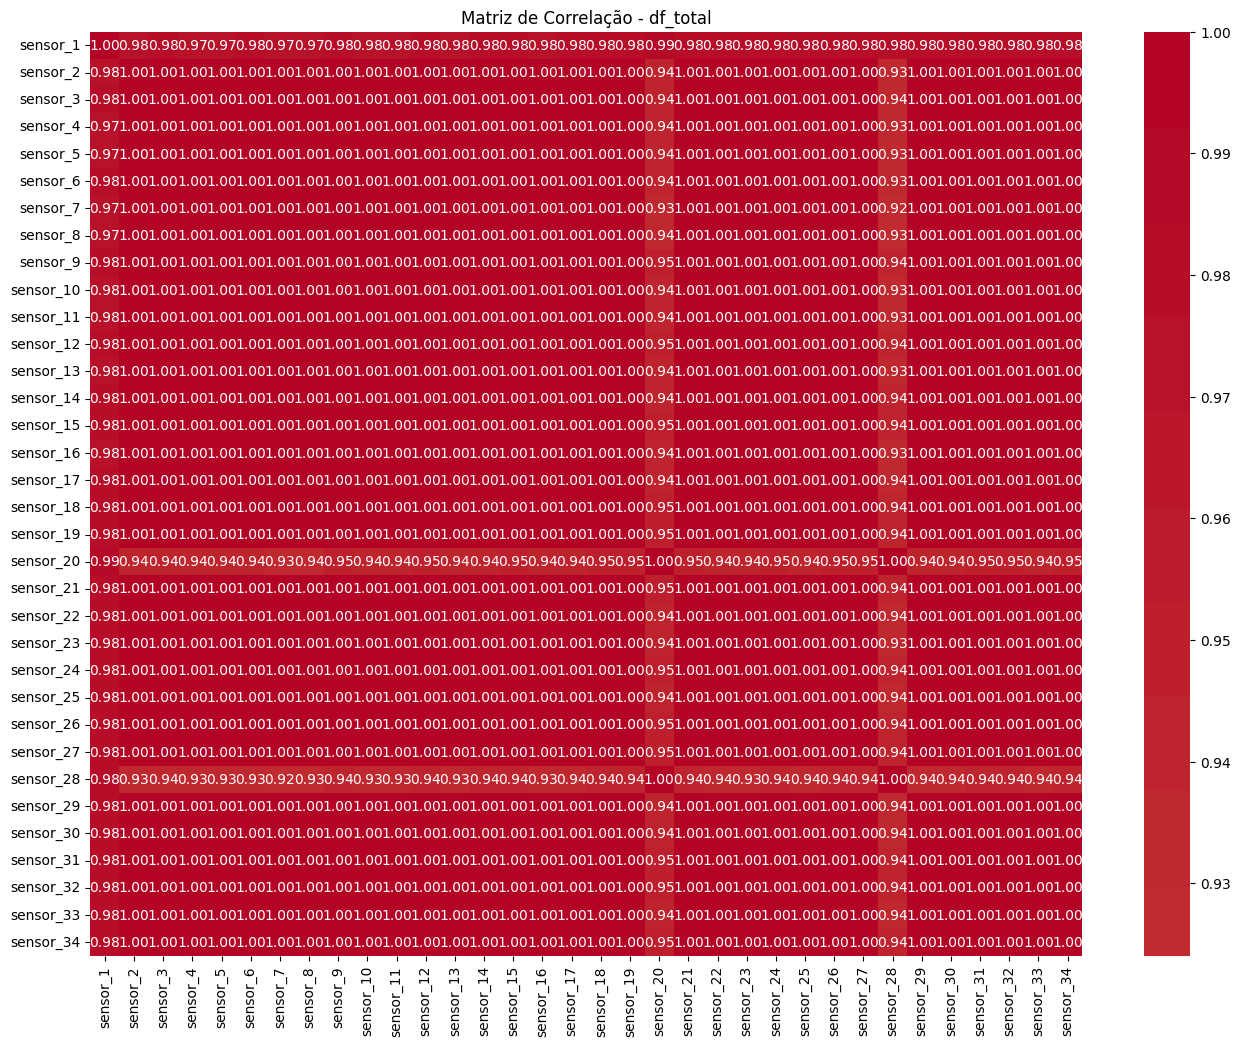

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlacao_sensores = df_sensores.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlacao_sensores, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação - df_total")
plt.show()

#HIPOTESE: Sensores altamente correlacionado entre si ao ponto que quando um dado do sensor sai dessa correlação ele diminui

- vamos ver esse comportamento em cada Dataset

### Comparação de Correlações entre Sensores em Diferentes Conjuntos de Dados

Aqui iremos comparar a **matriz de correlação entre sensores** em dois subconjuntos distintos de dados (`df_1` e `df_7`), além de exibir um resumo estrutural de outro conjunto (`df_2`).

#### Etapas do processo:

1. **Seleção das colunas dos sensores**:  
   Em ambos os conjuntos `df_1` e `df_7`, são selecionadas as colunas `sensor_1` até `sensor_34` para análise.

2. **Cálculo da correlação**:  
   A função `.corr()` é aplicada sobre os dados dos sensores para calcular a correlação de Pearson entre todas as combinações de sensores. Isso permite identificar relações lineares fortes (positivas ou negativas) entre os sensores dentro de cada subconjunto.

3. **Visualização com heatmap**:  
   Utiliza-se `seaborn` para gerar dois **mapas de calor** (heatmaps) que representam as correlações:
   - Um para `df_1`, exibido com o título `"Matriz de Correlação - df_1"`;
   - Outro para `df_7`, exibido com o título `"Matriz de Correlação - df_2"`.

   Esses heatmaps permitem **comparar visualmente os padrões de correlação** entre sensores nos diferentes contextos ou condições registradas em `df_1` e `df_7`.

4. **Inspeção estrutural de `df_2`**:  
   A função `df_2.info()` exibe um resumo do DataFrame, incluindo:
   - Número de entradas e colunas;
   - Tipos de dados;
   - Presença de valores nulos.

Esse tipo de análise é útil para:
- Investigar se o comportamento dos sensores varia entre cenários diferentes;
- Identificar sensores com respostas consistentes ou conflitantes;
- Validar a estrutura e qualidade dos dados em múltiplas amostras.


In [ ]:
colunas_sensores = [f"sensor_{i}" for i in range(1, 35)]
df_sen1= df_1[colunas_sensores]

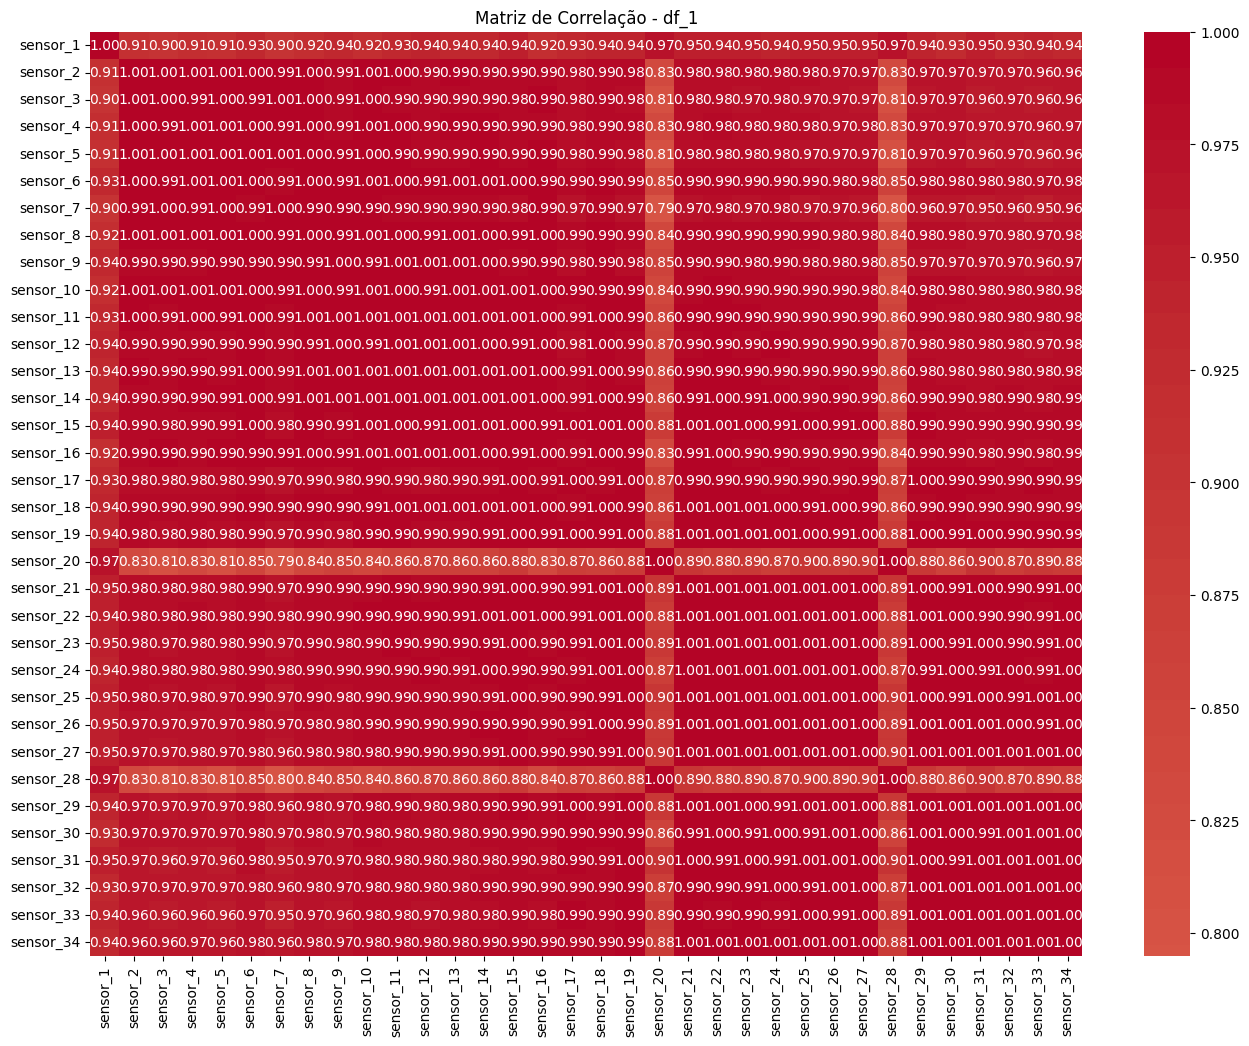

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlacao_sensores_1 = df_sen1.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlacao_sensores_1, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação - df_1")
plt.show()

In [ ]:
colunas_sensores = [f"sensor_{i}" for i in range(1, 35)]
df_sen2= df_7[colunas_sensores]

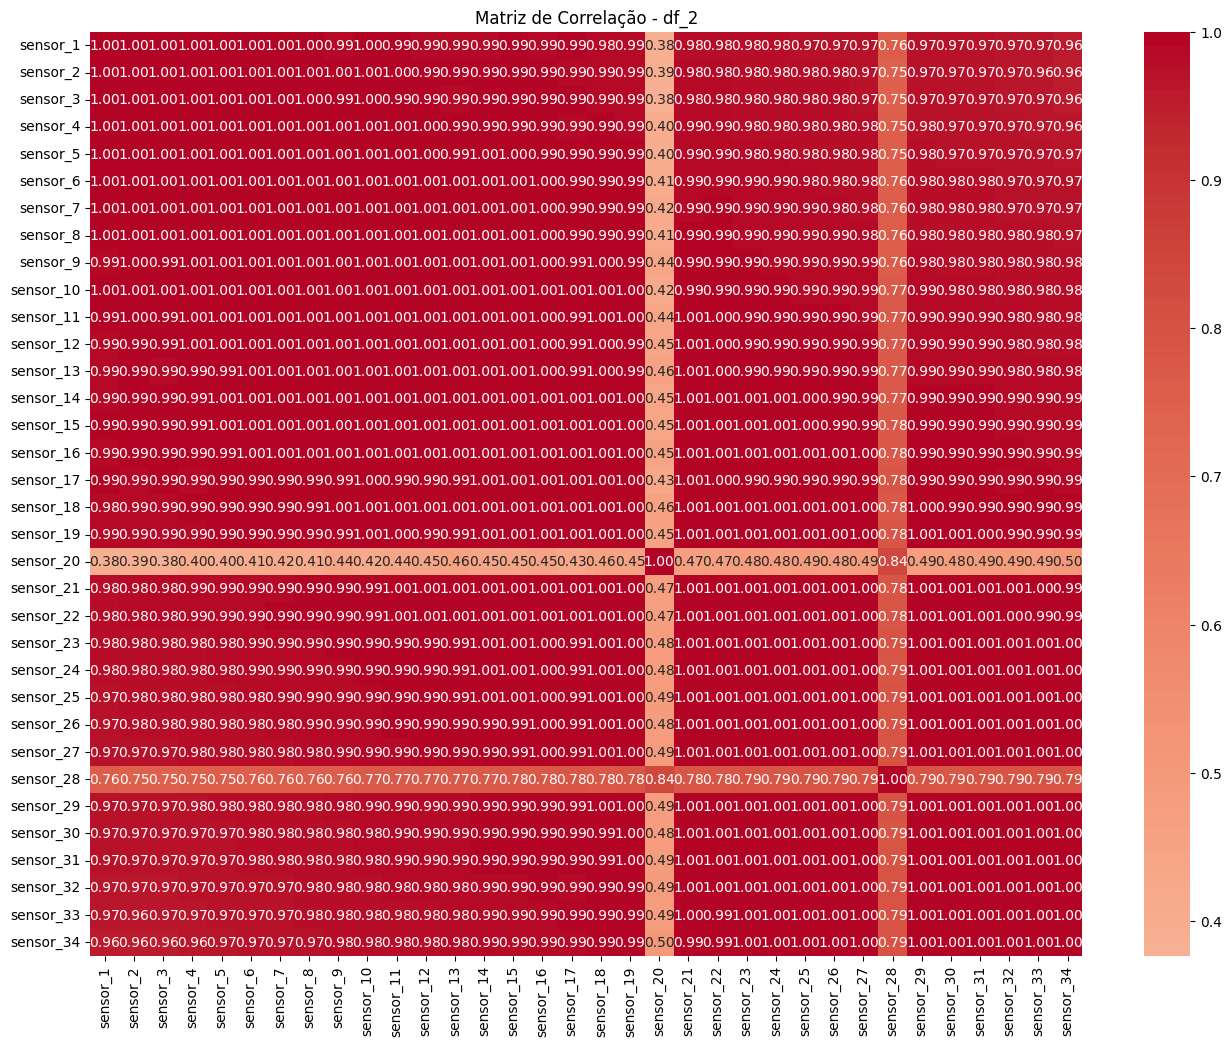

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlacao_sensores_1 = df_sen2.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlacao_sensores_1, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação - df_2")
plt.show()

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  100000 non-null  object 
 1   sensor_1   100000 non-null  float64
 2   sensor_2   100000 non-null  float64
 3   sensor_3   100000 non-null  float64
 4   sensor_4   100000 non-null  float64
 5   sensor_5   100000 non-null  float64
 6   sensor_6   100000 non-null  float64
 7   sensor_7   100000 non-null  float64
 8   sensor_8   100000 non-null  float64
 9   sensor_9   100000 non-null  float64
 10  sensor_10  100000 non-null  float64
 11  sensor_11  100000 non-null  float64
 12  sensor_12  100000 non-null  float64
 13  sensor_13  100000 non-null  float64
 14  sensor_14  100000 non-null  float64
 15  sensor_15  100000 non-null  float64
 16  sensor_16  100000 non-null  float64
 17  sensor_17  100000 non-null  float64
 18  sensor_18  100000 non-null  float64
 19  sensor_19  100000 non-nu

# Tentando encontrar padrão de coreelação de sensores com defeito


### Visualizações dos Sensores: Scatter, Linhas e Destaques

Iremos ter várias visualizações que permitem explorar diferentes aspectos dos dados dos sensores. As abordagens adotadas são:

1. **Relação entre Sensor 2 e Sensor 3 (Scatter Plot)**  
   - **Objetivo:** Verificar visualmente a relação entre os valores dos sensores 2 e 3.  
   - **Características:**  
     - Cada ponto representa uma amostra, com a posição definida pelo valor de `sensor_2` (eixo X) e `sensor_3` (eixo Y).  
     - A transparência (`alpha`) é ajustada para melhor visualização em áreas de sobreposição.  
     - São adicionados título, rótulos dos eixos e grade para facilitar a análise.

2. **Evolução Temporal dos Sensores 2 e 3 (Line Plot)**  
   - **Objetivo:** Acompanhar a variação dos valores dos sensores 2 e 3 ao longo do tempo (ou amostras).  
   - **Características:**  
     - Dois gráficos de linha são sobrepostos: um para `sensor_2` e outro para `sensor_3`.  
     - Cada linha utiliza uma cor diferente e transparência ajustada para destacar a evolução de cada sensor.  
     - A legenda indica qual linha corresponde a cada sensor.

3. **Evolução Temporal de Todos os Sensores**  
   - **Objetivo:** Visualizar, em um único gráfico, como todos os sensores evoluem ao longo das amostras.  
   - **Características:**  
     - Todas as séries de sensores (`sensor_1` a `sensor_34`) são plotadas no mesmo gráfico.  
     - Por ser um gráfico denso, a legenda é posicionada fora da área principal para evitar sobreposição e melhorar a leitura.  
     - É útil para observar tendências gerais e identificar sensores com comportamentos diferenciados.

4. **Destaque de Sensores Específicos (Sensores 1, 20 e 28)**  
   - **Objetivo:** Destacar a evolução de três sensores de interesse em meio a todos os outros, que são plotados em fundo cinza.  
   - **Características:**  
     - Os sensores não destacados são exibidos em cor cinza sem rótulo, servindo de fundo para contextualização.  
     - Os sensores `sensor_1`, `sensor_20` e `sensor_28` são destacados com cores vibrantes (vermelho, azul e verde, respectivamente) e espessura de linha diferenciada.  
     - A legenda é posicionada fora do gráfico para facilitar a identificação dos sensores destacados.

Cada uma destas visualizações contribui para uma análise mais completa dos dados, permitindo identificar correlações, tendências temporais e comportamentos específicos de interesse.


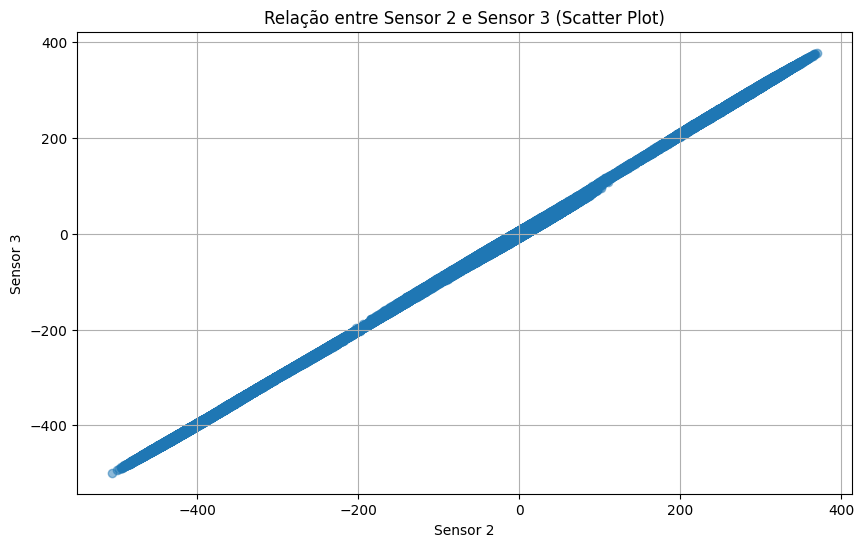

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_total['sensor_2'], df_total['sensor_3'], alpha=0.5)  # alpha controla a transparência
plt.title('Relação entre Sensor 2 e Sensor 3 (Scatter Plot)')
plt.xlabel('Sensor 2')
plt.ylabel('Sensor 3')
plt.grid(True)
plt.show()

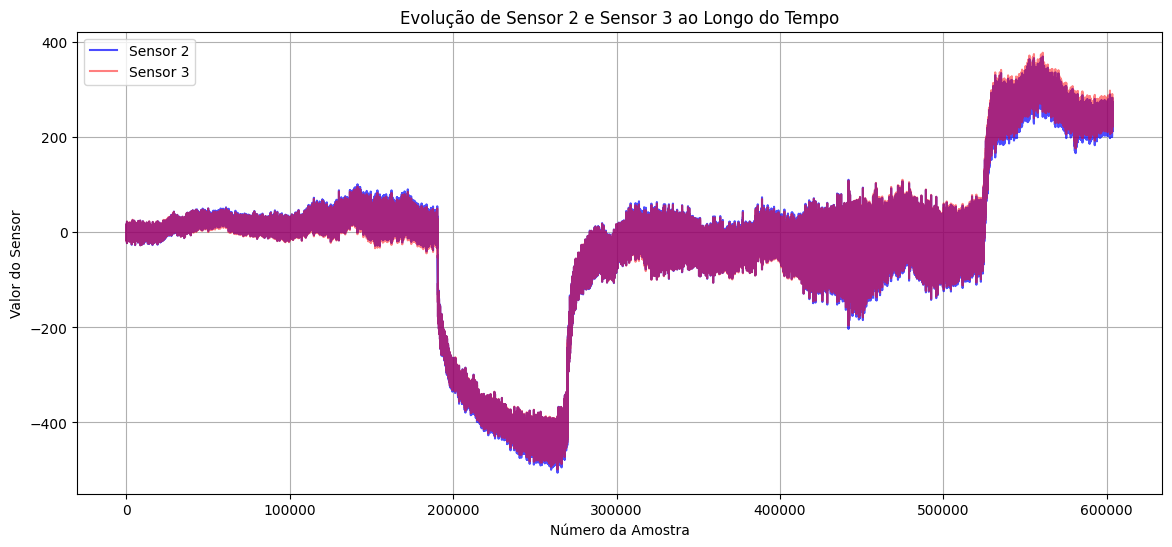

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_total['sensor_2'], label='Sensor 2', color='blue', alpha=0.7)
plt.plot(df_total['sensor_3'], label='Sensor 3', color='red', alpha=0.5)
plt.title('Evolução de Sensor 2 e Sensor 3 ao Longo do Tempo')
plt.xlabel('Número da Amostra')
plt.ylabel('Valor do Sensor')
plt.legend()
plt.grid(True)
plt.show()

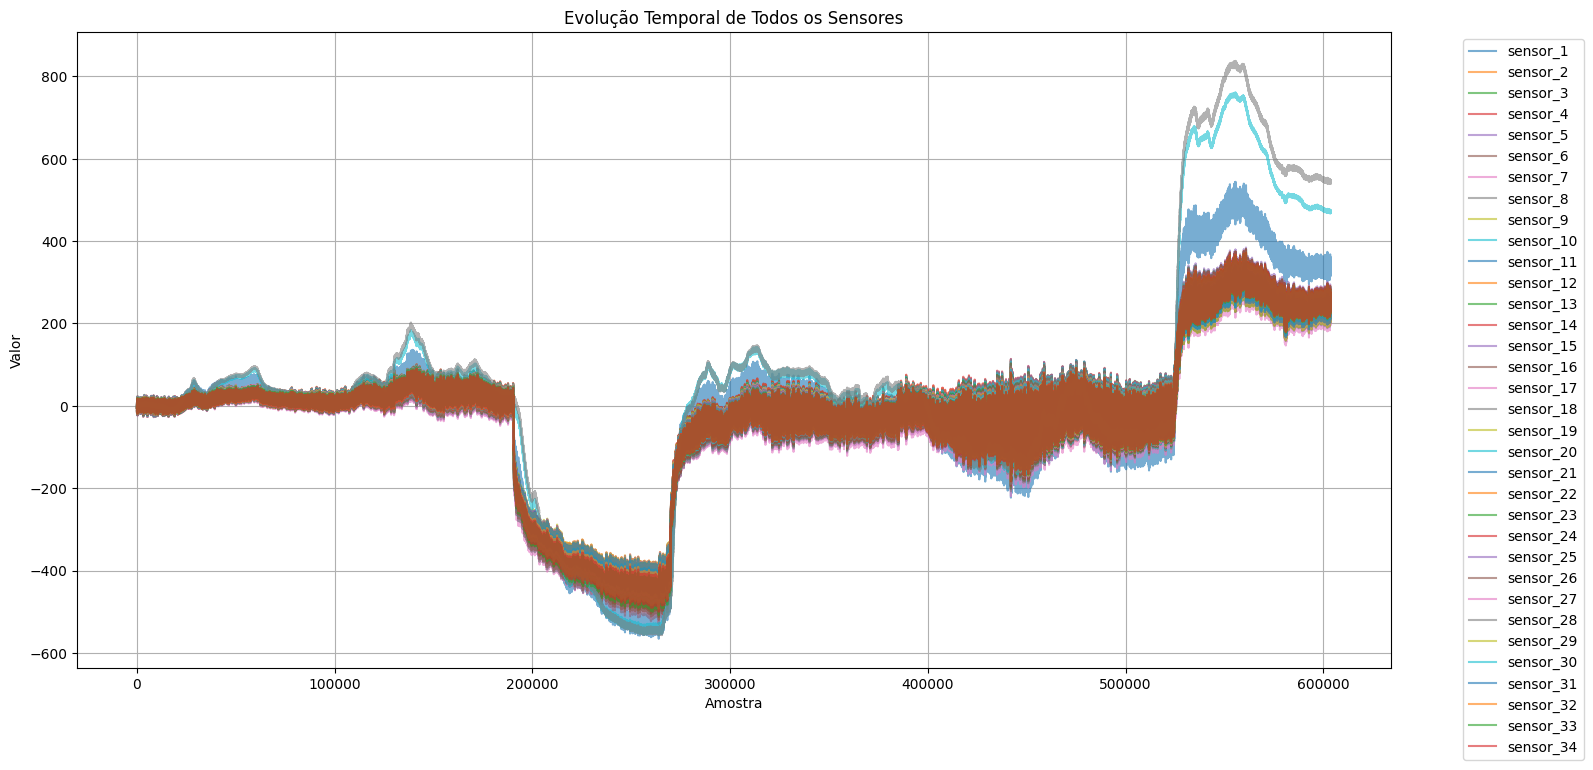

In [ ]:
import matplotlib.pyplot as plt

# Selecionar apenas as colunas dos sensores
sensor_cols = [f'sensor_{i}' for i in range(1, 35)]
df_sensors = df_total[sensor_cols]

# Plotar todos os sensores em um único gráfico (pode ficar confuso)
plt.figure(figsize=(16, 8))
for col in df_sensors.columns:
    plt.plot(df_sensors[col], label=col, alpha=0.6)
plt.title('Evolução Temporal de Todos os Sensores')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fora do gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

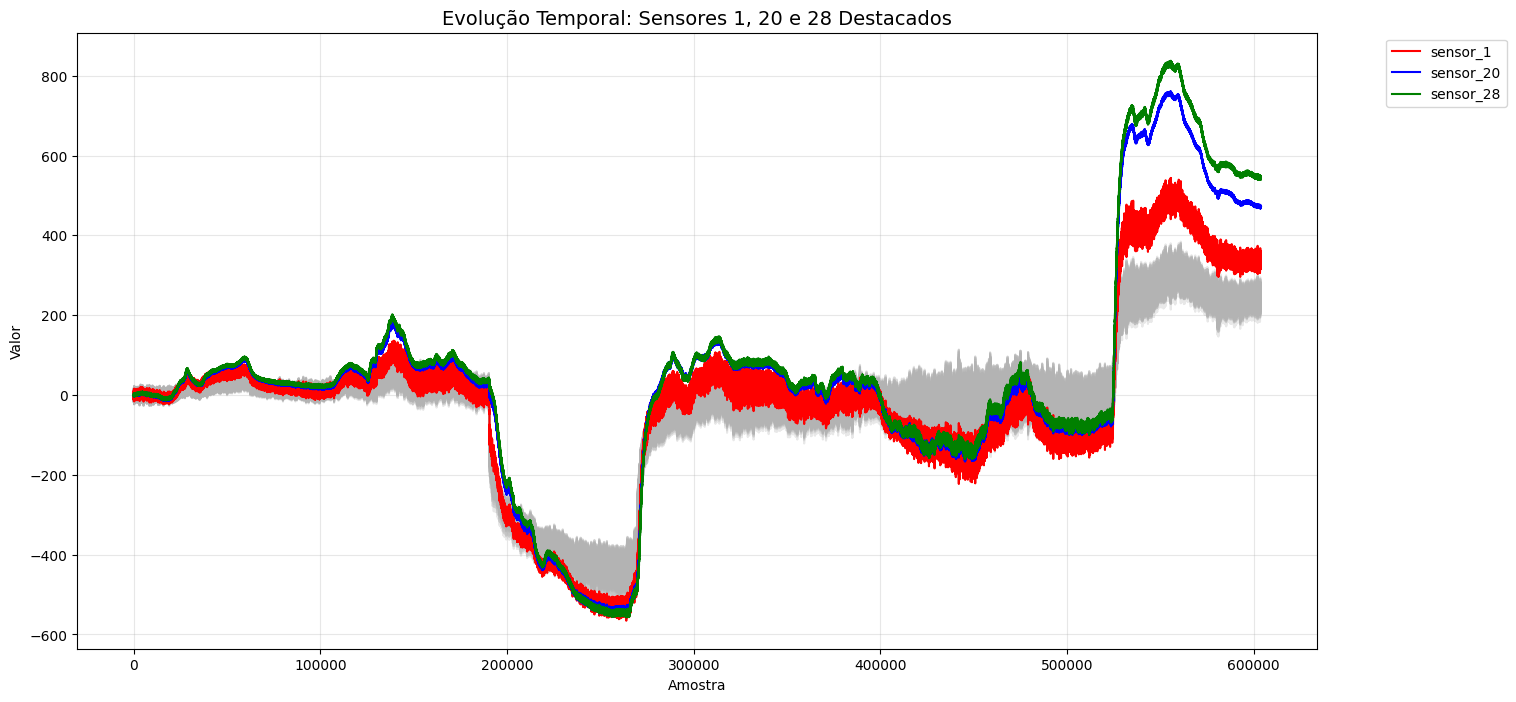

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sensores a destacar
highlight_sensors = ['sensor_1', 'sensor_20', 'sensor_28']
other_sensors = [col for col in df_sensors.columns if col not in highlight_sensors]

# Cores
highlight_colors = ['red', 'blue', 'green']
gray_color = (0.7, 0.7, 0.7, 0.3)  # RGBA (mais transparente)

# Plot
plt.figure(figsize=(16, 8))

# Plotar outros sensores (fundo cinza)
for col in other_sensors:
    plt.plot(df_sensors[col], color=gray_color, label=None)

# Plotar sensores destacados
for i, col in enumerate(highlight_sensors):
    plt.plot(df_sensors[col], color=highlight_colors[i], label=col, linewidth=1.5)

plt.title('Evolução Temporal: Sensores 1, 20 e 28 Destacados', fontsize=14)
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

Sabendo que esse padrao de vao seguinto um a função parecida das suas mediçoes ao longo do tempo. É valido analisar um boxplot dos resultados correlacionado

### Análise Detalhada de Linhas Específicas e Amostras Iniciais

Realizaremos duas visualizações focadas em subconjuntos específicos do DataFrame `df_total`, com o objetivo de examinar o comportamento pontual ou inicial de sensores selecionados.

---

#### 1. Boxplot de Linhas Fixas (Transpostas)

- **Objetivo:** Analisar a distribuição dos valores dos sensores em linhas específicas do DataFrame.
- **Como funciona:**
  - Seleciona um conjunto fixo de linhas (`0, 1, 2, 3, 4`) e extrai os valores de todos os sensores dessas linhas.
  - Os dados são **transpostos** para que cada boxplot represente a distribuição dos sensores para uma única linha.
  - O gráfico exibe os **valores dos sensores** como boxplots, possibilitando comparar a dispersão e possíveis outliers entre diferentes instantes (linhas).

---

#### 2. Evolução Temporal dos Primeiros 20 Registros para Sensores Selecionados

- **Objetivo:** Visualizar o comportamento inicial (primeiras 20 amostras) dos sensores `sensor_1`, `sensor_20` e `sensor_28`, destacando-os em meio aos demais.
- **Como funciona:**
  - Todos os sensores são plotados com cores cinzas claras para servir como fundo de referência.
  - Os sensores de interesse são destacados com cores vibrantes (vermelho, azul e verde), além de linhas mais espessas e marcadores visuais (`marker='o'`) para cada ponto.
  - A visualização mostra como os valores desses sensores se comportam nas amostras iniciais, o que pode indicar padrões iniciais, ruído ou instabilidades.

---

Essas visualizações são úteis para:
- **Análise pontual de registros específicos** (ex.: investigar casos suspeitos ou linhas de interesse);
- **Detecção de padrões iniciais ou instabilidades** nas primeiras amostras;
- Comparar **valores individuais dos sensores** ao invés de médias ou tendências gerais.


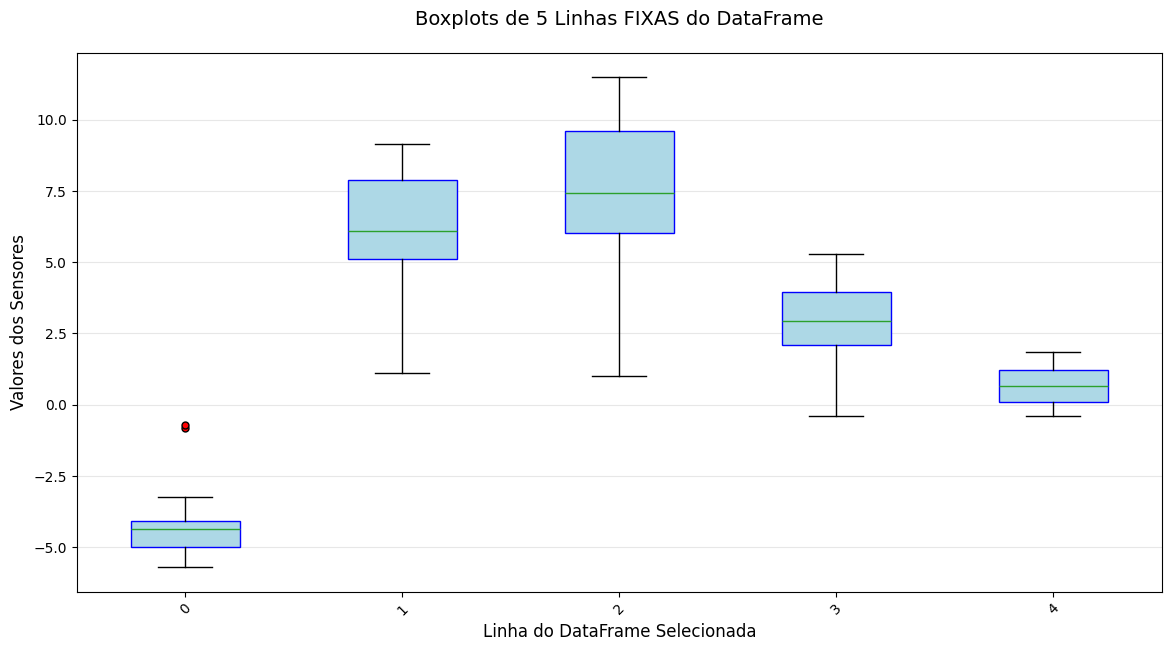

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Definir as linhas FIXAS que você quer analisar
linhas_fixas = [0, 1, 2, 3, 4]  # Exemplo: linhas 0, 100, 500, 1000, 2000

# 2. Selecionar apenas os dados dos sensores para essas linhas
dados_fixos = df_total.loc[linhas_fixas, [f'sensor_{i}' for i in range(1, 35)]].T  # Transposto

# 3. Configurar o gráfico
plt.figure(figsize=(14, 7))

# 4. Plotar os boxplots
boxplot = dados_fixos.boxplot(
    grid=False,
    patch_artist=True,  # Preenchimento colorido
    boxprops=dict(facecolor='lightblue', color='blue'),  # Cor da caixa
    whiskerprops=dict(color='black'),  # Cor dos "bigodes"
    capprops=dict(color='black'),  # Cor das extremidades
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red')  # Outliers
)

# 5. Personalizar o gráfico
plt.title("Boxplots de 5 Linhas FIXAS do DataFrame", fontsize=14, pad=20)
plt.xlabel("Linha do DataFrame Selecionada", fontsize=12)
plt.ylabel("Valores dos Sensores", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()

In [ ]:
print(df_total.loc[0, [f'sensor_{i}' for i in range(1, 35)]])

sensor_1    -3.255208
sensor_2    -4.984538
sensor_3    -5.086263
sensor_4    -4.984538
sensor_5    -5.493164
sensor_6    -4.781087
sensor_7    -5.696614
sensor_8    -5.187988
sensor_9    -4.882812
sensor_10   -4.882812
sensor_11   -4.984538
sensor_12   -4.577637
sensor_13   -4.984538
sensor_14   -4.984538
sensor_15    -4.06901
sensor_16   -5.086263
sensor_17   -4.374186
sensor_18   -4.781087
sensor_19    -4.06901
sensor_20   -0.813802
sensor_21   -4.272461
sensor_22   -4.170735
sensor_23   -4.577637
sensor_24    -4.06901
sensor_25   -4.374186
sensor_26   -4.170735
sensor_27   -4.170735
sensor_28   -0.712077
sensor_29   -3.967285
sensor_30    -4.06901
sensor_31   -3.662109
sensor_32    -3.86556
sensor_33   -3.967285
sensor_34   -4.272461
Name: 0, dtype: object


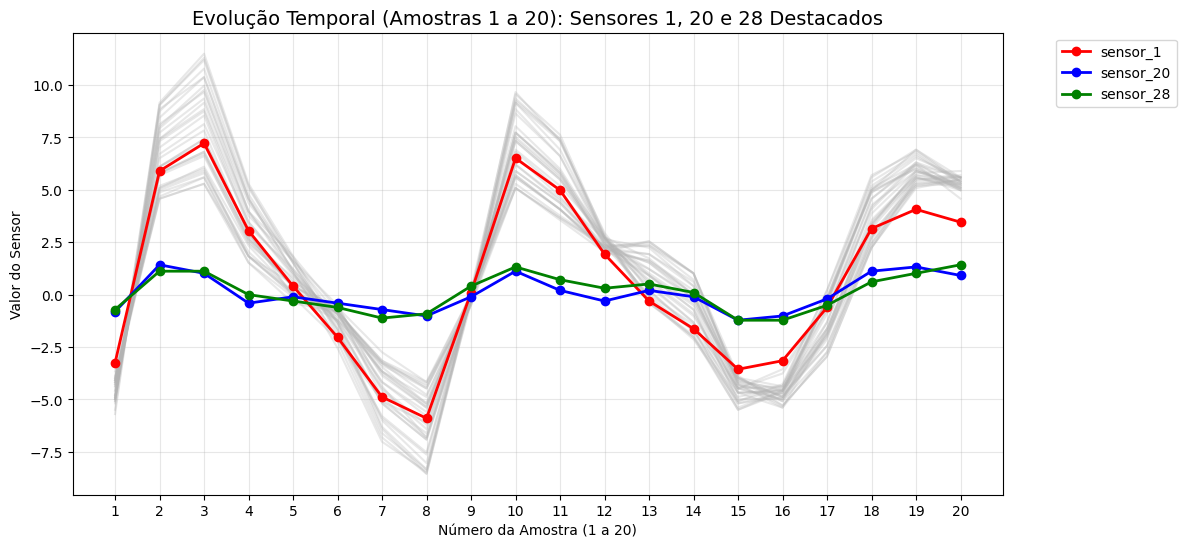

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sensores a destacar
highlight_sensors = ['sensor_1', 'sensor_20', 'sensor_28']
other_sensors = [col for col in df_sensors.columns if col not in highlight_sensors]

# Cores
highlight_colors = ['red', 'blue', 'green']
gray_color = (0.7, 0.7, 0.7, 0.3)  # RGBA (transparente)

# Plot
plt.figure(figsize=(12, 6))

# Plotar outros sensores (fundo cinza)
for col in other_sensors:
    plt.plot(df_sensors[col].iloc[0:20], color=gray_color, label=None)  # <-- Alteração aqui (iloc[0:20])

# Plotar sensores destacados
for i, col in enumerate(highlight_sensors):
    plt.plot(
        df_sensors[col].iloc[0:20],  # <-- Alteração aqui (intervalo 0-9, equivalente às 20 primeiras amostras)
        color=highlight_colors[i],
        label=col,
        linewidth=2,
        marker='o'  # Adiciona marcadores para pontos individuais
    )

# Ajustes do gráfico
plt.title('Evolução Temporal (Amostras 1 a 20): Sensores 1, 20 e 28 Destacados', fontsize=14)
plt.xlabel('Número da Amostra (1 a 20)')
plt.ylabel('Valor do Sensor')
plt.xticks(range(0, 20), labels=range(1, 21))  # Rótulos de 1 a 20 no eixo x
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

###  Análise Deslizante da Correlação entre Sensores (Sliding Window)

Análise de **correlação local** entre sensores, utilizando uma abordagem de **janela deslizante (sliding window)**. A ideia é calcular matrizes de correlação para pequenos intervalos consecutivos das amostras, possibilitando observar **mudanças sutis nos padrões de correlação** ao longo do tempo.

---

#### Etapas da análise:

1. **Seleção do intervalo de análise (linhas 0 a 9)**  
   Define-se uma janela inicial com as 10 primeiras amostras do DataFrame (`df_total`), que servirão de base para gerar subconjuntos.

2. **Criação de subconjuntos deslizantes (DataFrames parciais)**  
   São gerados 7 subconjuntos (`df_d1` a `df_d7`) com janelas de 4 linhas, deslizando uma linha por vez:
   - Exemplo: `df_d1` contém as linhas 0–3, `df_d2` as linhas 1–4, até `df_d7` com as linhas 6–9.

3. **Cálculo da matriz de correlação para cada janela**  
   Para cada um desses DataFrames, é calculada a matriz de correlação entre os sensores (`sensor_1` até `sensor_34`), utilizando o método `.corr()`.

4. **Visualização com heatmap**  
   Uma das janelas (`df_d1`, `df_d2`, ..., `df_d7`) é escolhida para visualização. A matriz de correlação resultante é:
   - Arredondada para 2 casas decimais;
   - Representada com um **heatmap** colorido utilizando a paleta `coolwarm`;
   - Anotada com os valores numéricos diretamente nas células;
   - Exibida com rótulos rotacionados para facilitar a leitura.

---

#### Finalidade da abordagem:

- **Detectar mudanças locais no padrão de correlação** entre sensores;
- Observar **eventos ou anomalias temporais** que afetam subconjuntos curtos de dados;
- Servir como base para técnicas mais avançadas como análise de séries temporais segmentadas ou detecção de rupturas.

Essa abordagem é especialmente útil em contextos em que as relações entre sensores podem variar ao longo do tempo, como em processos industriais, sinais biomédicos ou monitoramento ambiental.


In [ ]:
import pandas as pd

# Intervalo original: linhas 0 a 9 (10 amostras)
df_intervalo = df_total.iloc[0:10]  # Linhas 0 a 9

# Lista para armazenar os DataFrames deslizantes
dfs_deslizantes = []

# Gerar os 7 DataFrames deslizantes (janela de 4 linhas, passo de 1)
for i in range(7):
    df_temp = df_intervalo.iloc[i:i+4]  # Janela de 4 linhas (ex: 0-3, 1-4, ..., 6-9)
    dfs_deslizantes.append(df_temp)

# Nomes para referência
nomes_dfs = [f'df_d{i+1}' for i in range(7)]

In [ ]:
# Dicionário para armazenar as matrizes de correlação
correlacoes = {}

for i, df in enumerate(dfs_deslizantes):
    # Selecionar apenas as colunas dos sensores (0 a 34)
    sensores = [f'sensor_{i}' for i in range(1, 35)]  # Colunas sensor_1 a sensor_34
    df_sensores = df[sensores]

    # Calcular a correlação
    correlacoes[nomes_dfs[i]] = df_sensores.corr()

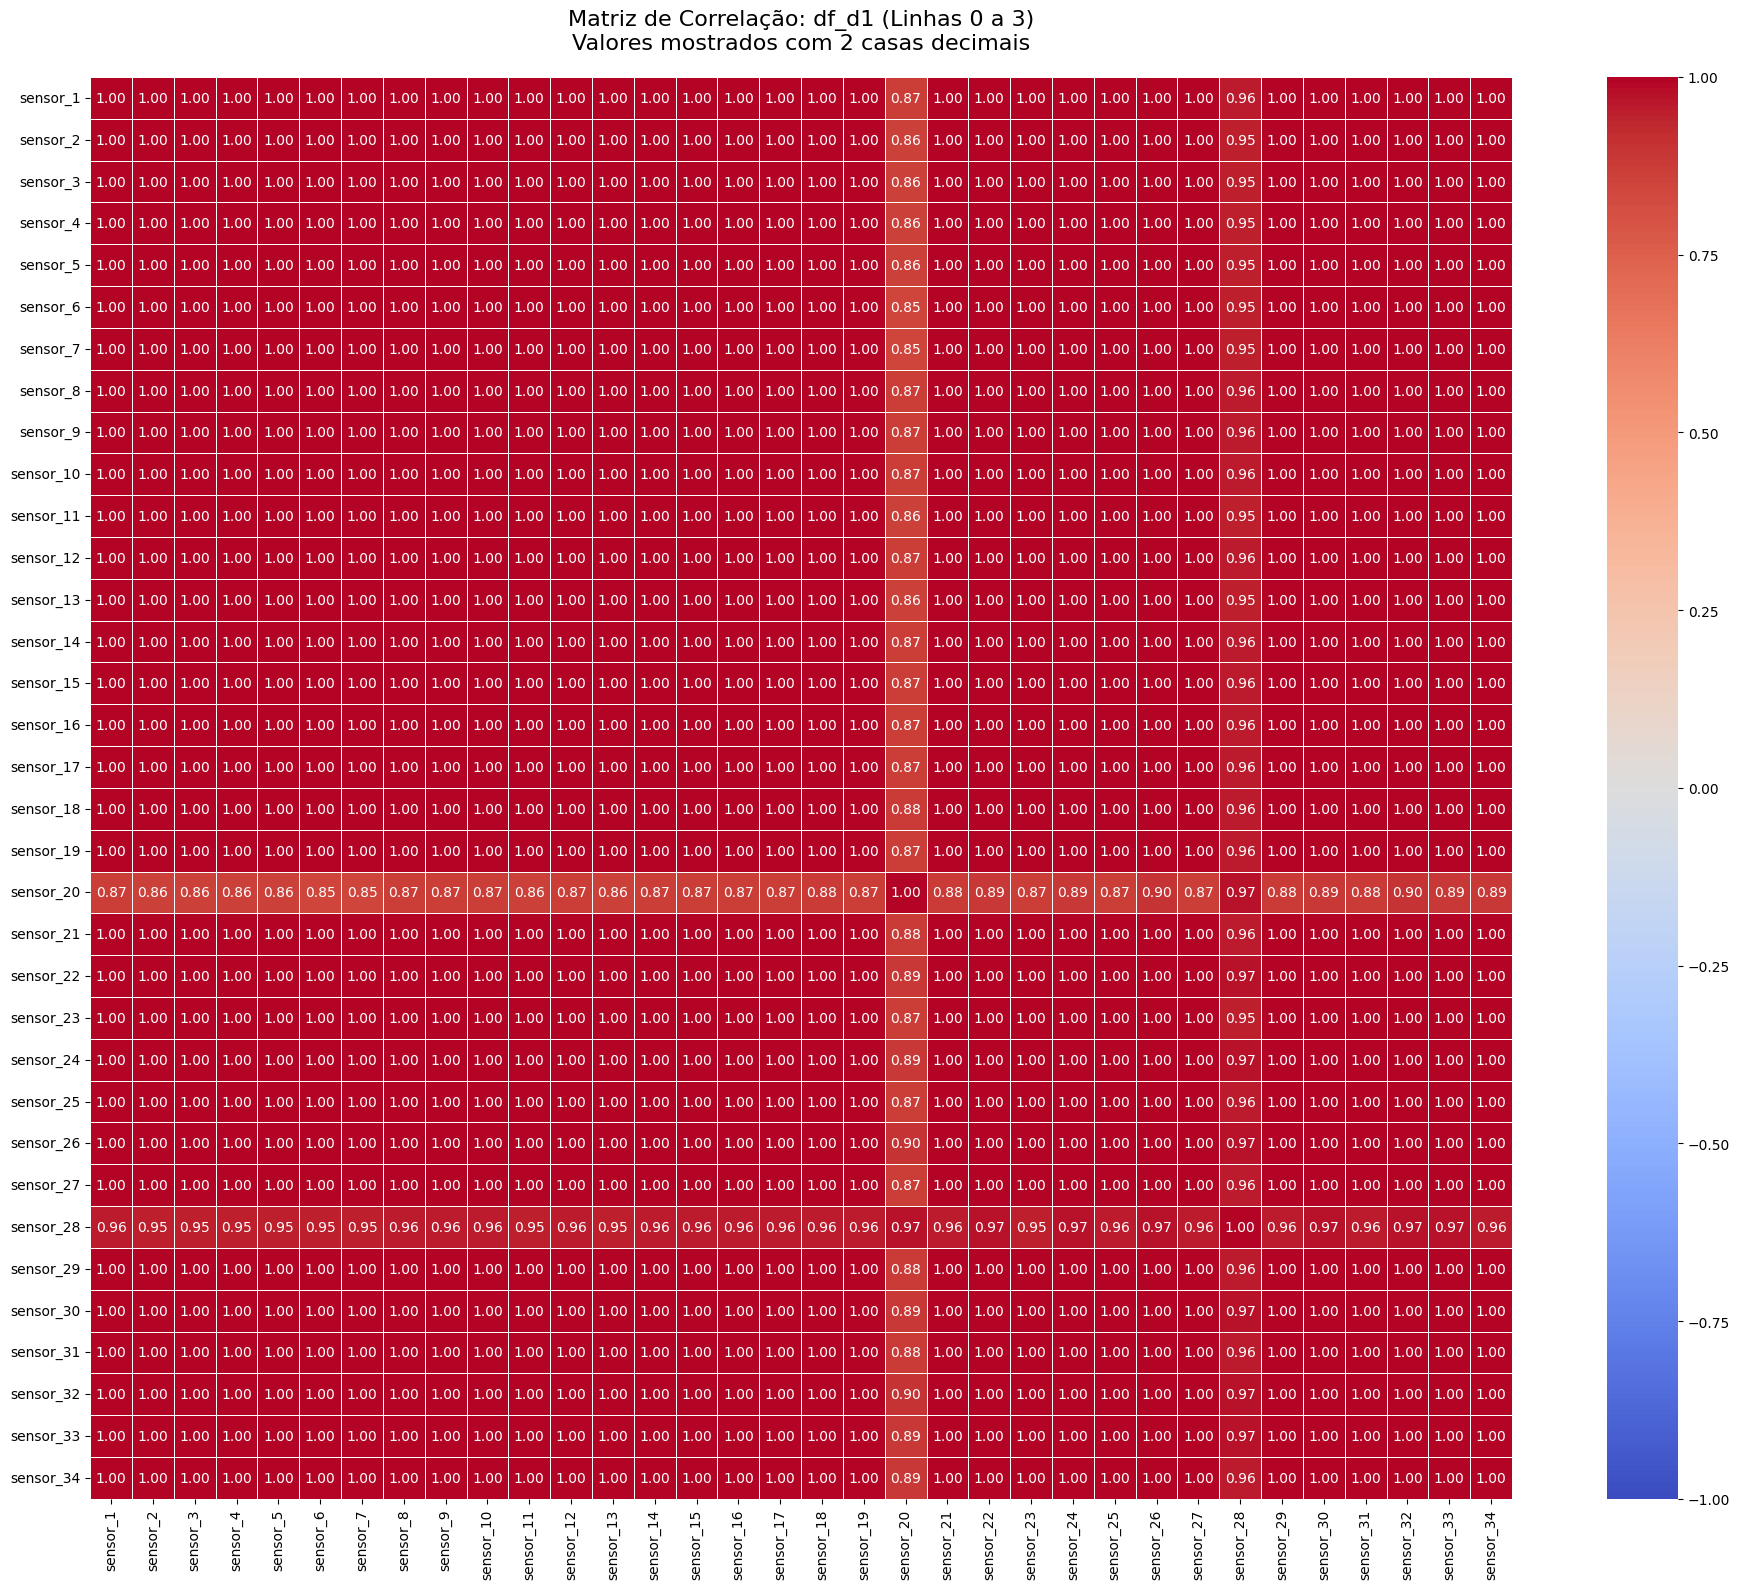

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definir o intervalo de linhas 0 a 9
df_intervalo = df_total.iloc[0:10]

# 2. Criar os DataFrames deslizantes
dfs_deslizantes = {
    'df_d1': df_intervalo.iloc[0:4],  # Linhas 0-3
    'df_d2': df_intervalo.iloc[1:5],  # Linhas 1-4
    'df_d3': df_intervalo.iloc[2:6],  # Linhas 2-5
    'df_d4': df_intervalo.iloc[3:7],  # Linhas 3-6
    'df_d5': df_intervalo.iloc[4:8],  # Linhas 4-7
    'df_d6': df_intervalo.iloc[5:9],  # Linhas 5-8
    'df_d7': df_intervalo.iloc[6:10]  # Linhas 6-9
}

# 3. Escolher qual DataFrame analisar (ex: 'df_d3')
df_escolhido = 'df_d1'  # Altere aqui para df_d1, df_d2, etc.

# 4. Selecionar os sensores (1 a 34)
sensores = [f'sensor_{i}' for i in range(1, 35)]
df_sensores = dfs_deslizantes[df_escolhido][sensores]

# 5. Calcular a correlação e formatar para 2 casas decimais
corr = df_sensores.corr().round(2)

# 6. Plotar a matriz com valores
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr,
    annot=True,  # Mostra os valores
    annot_kws={'size': 10},  # Tamanho da fonte
    fmt=".2f",  # Formato: 2 casas decimais
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5  # Linhas divisórias mais finas
)

# 7. Título personalizado
linha_inicial = int(df_escolhido.split('_d')[1]) - 1
plt.title(
    f'Matriz de Correlação: {df_escolhido} (Linhas {linha_inicial} a {linha_inicial + 3})\nValores mostrados com 2 casas decimais',
    fontsize=16,
    pad=20
)
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x
plt.tight_layout()
plt.show()

Como não conseguimos identificar um padrão de erro iremos usar abordagem de um dataset reduzido.

### Amostragem Periódica por Blocos: Seleção de Grupos de 3 Linhas a Cada 23

Aqui realizamos uma **amostragem periódica em blocos** do DataFrame `df_total`. A ideia é extrair subconjuntos representativos dos dados a intervalos fixos, preservando a estrutura local de grupos consecutivos de amostras.

---

#### Etapas da transformação:

1. **Configuração da estratégia de amostragem**  
   Define-se um `step` de 23, o que significa que serão **puladas 20 amostras entre cada grupo de 3 linhas** selecionadas:
   - Exemplo: pega-se as linhas 0–2, depois 23–25, depois 46–48, e assim por diante;
   - Isso simula uma coleta **espaçada e agrupada** no tempo ou no processo.

2. **Construção da amostra `df_rt1`**  
   As linhas selecionadas são extraídas do `df_total`, reiniciando o índice para manter consistência na visualização.

3. **Limpeza das colunas irrelevantes**  
   As colunas `'intervalo_tempo'` e `'label'` são removidas da nova amostra, deixando apenas os dados relevantes — geralmente os sensores.

4. **Inspeção do novo DataFrame**  
   Com `.info()` e `.head()`, são verificados o formato, tipos de dados e uma prévia das primeiras amostras da nova estrutura.

---

#### Finalidade da abordagem:

- Criar um **conjunto de dados reduzido** com representatividade temporal;
- Evitar redundância entre amostras consecutivas (alta correlação temporal);
- Preservar **blocos contíguos** de informação, importantes para análises baseadas em dinâmica local (ex: sensores em processos industriais, ECG, etc.);
- Pode servir como base para **validação cruzada temporal**, testes rápidos ou visualizações simplificadas.

Essa técnica é útil quando se deseja balancear **redução de dados** com **preservação de contexto local** em séries temporais ou medições contínuas.


In [ ]:
import pandas as pd

# Suponha que df_total já exista
step = 23  # 3 linhas + 10 puladas
selected_rows = []

for i in range(0, len(df_total), step):
    selected_rows.extend(range(i, min(i+3, len(df_total))))  # Pega 3 linhas ou o restante

df_rt1 = df_total.iloc[selected_rows].reset_index(drop=True)

In [ ]:
df_rt1 = df_rt1.drop(columns=['intervalo_tempo'])
df_rt1 = df_rt1.drop(columns=['label'])


In [ ]:
df_rt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78759 entries, 0 to 78758
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        78759 non-null  datetime64[ns]
 1   sensor_1         78759 non-null  float64       
 2   sensor_2         78759 non-null  float64       
 3   sensor_3         78759 non-null  float64       
 4   sensor_4         78759 non-null  float64       
 5   sensor_5         78759 non-null  float64       
 6   sensor_6         78759 non-null  float64       
 7   sensor_7         78759 non-null  float64       
 8   sensor_8         78759 non-null  float64       
 9   sensor_9         78759 non-null  float64       
 10  sensor_10        78759 non-null  float64       
 11  sensor_11        78759 non-null  float64       
 12  sensor_12        78759 non-null  float64       
 13  sensor_13        78759 non-null  float64       
 14  sensor_14        78759 non-null  float

In [ ]:
df_rt1.head()

,Timestamp,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,label_sensor_25,label_sensor_26,label_sensor_27,label_sensor_28,label_sensor_29,label_sensor_30,label_sensor_31,label_sensor_32,label_sensor_33,label_sensor_34
0,2023-09-24 00:00:00.863,-3.255208,-4.984538,-5.086263,-4.984538,-5.493164,-4.781087,-5.696614,-5.187988,-4.882812,...,0,0,0,0,0,0,0,0,0,0
1,2023-09-24 00:00:01.863,5.900065,9.155273,8.443196,9.053548,8.748372,8.036295,9.053548,8.850098,7.731120,...,0,0,0,0,0,0,0,0,0,0
2,2023-09-24 00:00:02.863,7.222493,11.494954,10.375977,11.291504,10.782877,9.969075,11.189778,10.375977,9.358724,...,0,0,0,1,0,0,0,0,0,0
3,2023-09-24 00:00:23.866,-7.324219,-10.477701,-10.477701,-10.579427,-10.884603,-10.070801,-10.782877,-10.579427,-9.562174,...,0,0,0,0,0,0,0,0,0,0
4,2023-09-24 00:00:24.866,-12.207031,-17.598469,-17.395020,-17.598469,-17.903645,-16.377766,-17.801920,-17.191568,-14.851888,...,0,0,0,0,0,0,0,0,0,0


###Treinamento dos modelos com LSTM

### Normalização Estatística Manual dos Sensores

Aqui aplicamos uma **normalização min-max manual** nos dados dos sensores do DataFrame `df_rt1`, utilizando estatísticas previamente conhecidas (mínimo e máximo globais da base original).

---

#### Fórmula Utilizada

A normalização segue a fórmula tradicional do **Min-Max Scaling**:

\[
X_{norm} = \frac{X - \text{min}}{\text{max} - \text{min}}
\]

No contexto aplicado:

- **min = -29.3986**
- **max = 319.519**
- **média (utilizada apenas para referência) = 31.9291**

---

#### Por que normalizar?

- Sensores possuem escalas diferentes e valores em faixas distintas;
- Modelos de machine learning (especialmente redes neurais) são **sensíveis à escala dos dados**;
- A normalização melhora a **estabilidade numérica** e acelera a **convergência do treinamento**;
- Evita que sensores com valores maiores dominem a função de perda.

---

#### Detalhes técnicos:

- A operação é feita somente nas colunas que começam com `"sensor_"`;
- A média **não está sendo usada** diretamente na equação — ela é mencionada apenas para documentar o centro da distribuição original;
- O resultado transforma todos os valores para uma **faixa entre 0 e 1**, compatível com muitas funções de ativação (como sigmoid e ReLU).

---

> Essa normalização manual é útil quando os dados são coletados em tempo real ou por lotes diferentes, mas devem ser comparáveis usando a **mesma escala de referência global**.


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Normalização com estatísticas fornecidas
sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
df_rt1[sensor_cols] = (df_rt1[sensor_cols] - 31.9291) / (319.519 - -29.3986)
df_rt1.head()

,Timestamp,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,label_sensor_25,label_sensor_26,label_sensor_27,label_sensor_28,label_sensor_29,label_sensor_30,label_sensor_31,label_sensor_32,label_sensor_33,label_sensor_34
0,2023-09-24 00:00:00.863,-0.100838,-0.105795,-0.106086,-0.105795,-0.107252,-0.105212,-0.107836,-0.106378,-0.105503,...,0,0,0,0,0,0,0,0,0,0
1,2023-09-24 00:00:01.863,-0.074599,-0.065270,-0.067311,-0.065561,-0.066436,-0.068477,-0.065561,-0.066145,-0.069352,...,0,0,0,0,0,0,0,0,0,0
2,2023-09-24 00:00:02.863,-0.070809,-0.058564,-0.061771,-0.059147,-0.060605,-0.062938,-0.059439,-0.061771,-0.064687,...,0,0,0,1,0,0,0,0,0,0
3,2023-09-24 00:00:23.866,-0.112500,-0.121538,-0.121538,-0.121830,-0.122704,-0.120372,-0.122413,-0.121830,-0.118914,...,0,0,0,0,0,0,0,0,0,0
4,2023-09-24 00:00:24.866,-0.126494,-0.141946,-0.141363,-0.141946,-0.142821,-0.138448,-0.142529,-0.140780,-0.134075,...,0,0,0,0,0,0,0,0,0,0


### Treinamento de LSTM com Janela Deslizante e Focal Loss

Neste trecho, realizamos o pipeline completo de **preparação dos dados sequenciais**, definição de um modelo com **LSTM** e **treinamento supervisionado binário** com **Focal Loss**.

---

#### Criação de Janelas (Sliding Window)

- O objetivo é capturar **comportamentos temporais** dos sensores ao longo do tempo.
- Usamos janelas de tamanho `240` e passo (`stride`) de `60`, gerando múltiplas amostras sobrepostas.
- Para cada **sensor individualmente**, geramos uma sequência `X` e sua respectiva **classe binária `y`**, baseada no máximo de `label_sensor` da janela.

---

#### Particionamento dos Dados

- **70% Treinamento**
- **15% Validação**
- **15% Teste**
- Os dados são organizados em **`tf.data.Dataset`** com batching, shuffle e prefetch, otimizando o desempenho do treinamento em TensorFlow.

---

#### Balanceamento de Classes

- Classes desbalanceadas afetam o desempenho do modelo.
- Utilizamos `compute_class_weight` para compensar o desequilíbrio, atribuindo pesos maiores à classe minoritária.

---

#### Arquitetura da Rede Neural

- 2 camadas **LSTM com 64 unidades**, seguidas de **Batch Normalization** para estabilidade.
- Uma camada **densa intermediária** (`Dense(64, relu)`) e uma camada final **sigmoid**, que gera a saída binária.
- A entrada é um tensor com shape `(240, 1)`, ou seja, 240 timesteps para um único sensor.

---

#### Compilação do Modelo

- Otimizador: **Adam** com taxa de aprendizado 0.01;
- Função de perda: **Binary Focal Loss**, que foca mais em exemplos difíceis;
- Métricas: **Precision**, **Recall** e **AUC**.

---

#### Callbacks Utilizados

1. `EarlyStopping` (baseado em perda de treino);
2. `EarlyStopping` (baseado em recall de validação — usado para restaurar os melhores pesos);
3. `ReduceLROnPlateau` para ajustar a taxa de aprendizado dinamicamente.

---

#### Avaliação do Modelo

- Após o treinamento, usamos o conjunto de teste para gerar previsões e calcular:
  - **Relatório de Classificação** (`precision`, `recall`, `f1-score`);
  - **Matriz de Confusão** para análise detalhada de verdadeiros positivos/negativos.

---

> Este pipeline é útil para **detecção de eventos raros** em séries temporais, como falhas ou anomalias, usando LSTM e perda focal.


In [ ]:
WINDOW = 240
STRIDE = 60

def create_windows(df, window_size=240, stride=60):
    X, y = [], []
    for start in range(0, len(df) - window_size + 1, stride):
        end = start + window_size
        window = df.iloc[start:end]
        for sensor in sensor_cols:
            X.append(window[[sensor]].values)
            y.append(int(window[f'label_{sensor}'].max()))
    return np.array(X), np.array(y)

X, y = create_windows(df_rt1)
print(f"Shape X: {X.shape}, Shape y: {y.shape}")

Shape X: (44506, 240, 1), Shape y: (44506,)


In [ ]:
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

model = tf.keras.Sequential([
    layers.Input(shape=(240, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.BatchNormalization(),
    layers.LSTM(64),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryFocalCrossentropy(gamma=2.0),
    metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

In [ ]:
callbacks = [
    callbacks.EarlyStopping(monitor='loss', patience=8, restore_best_weights=False, mode='min'),
    callbacks.EarlyStopping(monitor='val_recall', mode='max', patience=12, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_recall', factor=0.1, patience=5, min_lr=0.0001)
]


history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=callbacks, class_weight=class_weights)


Epoch 1/50
974/974 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - auc: 0.3967 - loss: 0.7265 - precision: 1.6398e-04 - recall: 0.3091 - val_auc: 0.0000e+00 - val_loss: 0.0015 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0100
Epoch 2/50
974/974 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - auc: 0.5095 - loss: 1.3035 - precision: 1.6631e-04 - recall: 0.3070 - val_auc: 0.0000e+00 - val_loss: 0.0146 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0100
Epoch 3/50
974/974 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - auc: 0.4513 - loss: 1.8047 - precision: 6.0515e-04 - recall: 0.6550 - val_auc: 0.0000e+00 - val_loss: 4.1028e-05 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0100
Epoch 4/50
974/974 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - auc: 0.6299 - loss: 1.2013 - precision: 3.0840e-04 - recall: 0.6311 - val_auc: 0.0000e+00 - val_loss: 0.0718 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0100
Epoch 5/50
974/974 ━━━━━━━━━

209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6677

    accuracy                           1.00      6677
   macro avg       1.00      1.00      1.00      6677
weighted avg       1.00      1.00      1.00      6677



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


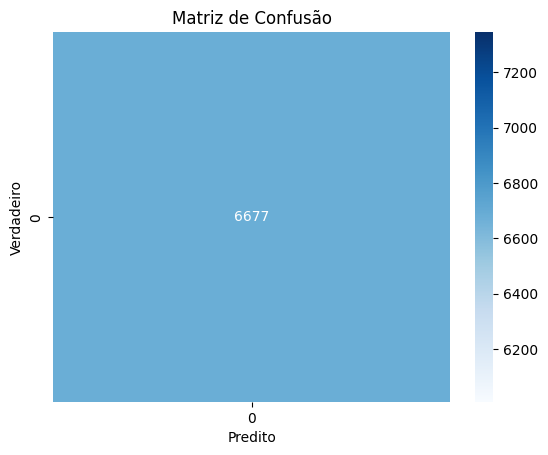

In [ ]:
y_pred = model.predict(test_ds) > 0.5
y_true = np.concatenate([y for x, y in test_ds], axis=0)

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()